In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Load dataset (for demonstration, using 20 newsgroups dataset)
# In practice, replace this with a spam SMS dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.43      0.51       236
           1       0.56      0.66      0.61       287
           2       0.64      0.67      0.65       290
           3       0.55      0.69      0.61       285
           4       0.76      0.57      0.65       312
           5       0.80      0.74      0.77       308
           6       0.69      0.68      0.69       276
           7       0.74      0.70      0.72       304
           8       0.44      0.76      0.56       279
           9       0.85      0.80      0.82       308
          10       0.88      0.88      0.88       309
          11       0.75      0.73      0.74       290
          12       0.68      0.56      0.61       304
          13       0.82      0.78      0.80       300
          14       0.81      0.73      0.77       297
          15       0.49      0.88      0.63       292
          16       0.65      0.74      0.70

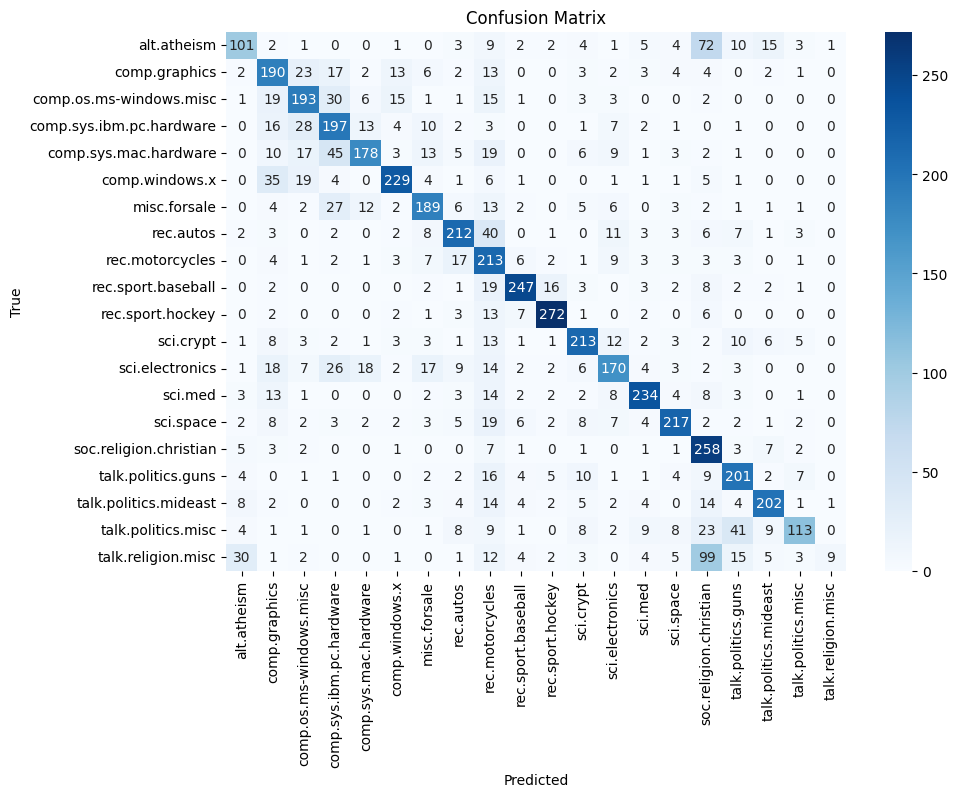

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
